<h2><font color="#004D7F" size=6>Módulo 1. Análisis de datos</font></h2>
<h1><font color="#004D7F" size=5>1. Cargar un conjunto de datos</font></h1>
<br>
<div style="text-align: right">
<font color="#004D7F" size=3>Eddy Hugo Arias Borda</font><br>
<font color="#004D7F" size=3>Machine Learning con Python</font><br>

<a id="section2"></a>
# <font color="#004D7F" size=4> 1.1. Cargar un archivo CSV desde Pandas</font>

Se cargan el dataset usando Pandas y la función `pandas.read_csv()`. El nombre del archivo es `ionosphere.csv` y está en el directorio de trabajo actual. Como este archivo CSV no tiene cabecera tenga en cuenta que se le ha colocado un encabezado respetando que la última columna es la variable objetivo "Class" que si dice **"g"** indica que es un buen resultado y si dice **"b"**, entonces es un mal resultado.

In [ ]:
# Cargar archivo CSV usando Pandasimport matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import itertools
from scipy import stats
%matplotlib inline

filename = 'ionosphere.data'
names = ['V01','V02','V03','V04','V05','V06','V07','V08','V09','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20',
         'V21','V22','V23','V24','V25','V26','V27','V28','V29','V30','V31','V32','V33','V34','Class']
mydata = pd.read_csv(filename, names = names)
print(mydata.shape)

El dataset tiene 351 instancias y 35 variables

In [ ]:
mydata

Debemos cambiar la variable **Class** a numérica, donde **g** sea **1** y **b** sea **0**, para ello usamos el comando `get_dummies`.

In [210]:
# Convertir la variable categórica Class a variable numérica ClassGood
data = pd.get_dummies(mydata,columns=["Class"],drop_first=True)
data.rename(columns={'Class_g': 'ClassGood'}, inplace=True)
data

,V01,V02,V03,V04,V05,V06,V07,V08,V09,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,ClassGood
0,1,0,0.995,-5.889e-02,0.852,0.023,0.834,-0.377,1.000,0.038,...,-0.512,0.411,-0.462,0.213,-0.341,0.423,-5.449e-01,0.186,-0.453,1
1,1,0,1.000,-1.883e-01,0.930,-0.362,-0.109,-0.936,1.000,-0.045,...,-0.266,-0.205,-0.184,-0.190,-0.116,-0.166,-6.288e-02,-0.137,-0.024,0
2,1,0,1.000,-3.365e-02,1.000,0.005,1.000,-0.121,0.890,0.012,...,-0.402,0.590,-0.221,0.431,-0.174,0.604,-2.418e-01,0.560,-0.382,1
3,1,0,1.000,-4.516e-01,1.000,1.000,0.712,-1.000,0.000,0.000,...,0.907,0.516,1.000,1.000,-0.201,0.257,1.000e+00,-0.324,1.000,0
4,1,0,1.000,-2.401e-02,0.941,0.065,0.921,-0.233,0.772,-0.164,...,-0.652,0.133,-0.532,0.024,-0.622,-0.057,-5.957e-01,-0.046,-0.657,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.835,8.298e-02,0.737,-0.147,0.843,-0.056,0.904,-0.046,...,-0.042,0.835,0.001,1.000,0.128,0.867,-1.071e-01,0.905,-0.043,1
347,1,0,0.951,4.190e-03,0.952,-0.027,0.934,-0.019,0.946,0.016,...,0.014,0.935,0.049,0.932,0.082,0.941,-3.500e-04,0.915,0.047,1
348,1,0,0.947,-3.400e-04,0.932,-0.032,0.952,-0.034,0.956,0.024,...,0.032,0.925,0.025,0.921,0.022,0.925,4.420e-03,0.927,-0.006,1
349,1,0,0.906,-1.657e-02,0.981,-0.020,0.957,-0.036,0.857,0.001,...,-0.021,0.891,-0.078,0.830,-0.172,0.960,-3.757e-02,0.874,-0.162,1


<h1><font color="#004D7F" size=5>2. Descripción de un conjunto de datos. Estadística descriptiva.</font></h1>

La inspección de nuestro conjunto de datos es fundamental para poder entender mejor que técnica utilizar; además, nos ayudará a desarrollar nuestra intuición y hacernos preguntas sobre ellos. Las múltiples perspectivas de sus datos lo desafiarán a pensar en los datos de manera diferente.

<a id="section23"></a>
## <font color="#004D7F" size=4>2.1. Revisar los datos: _head()_ </font>

Puede revisar las primeras 20 filas de sus datos utilizando la función `head()` en el DataFrame de Pandas. Puede ver que la primera columna enumera el número de fila, lo cual es útil para hacer referencia a una observación específica.

In [211]:
# Data Types for Each Attribute
data.head(20)

,V01,V02,V03,V04,V05,V06,V07,V08,V09,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,ClassGood
0,1,0,0.995,-0.059,0.852,0.023,0.834,-0.377,1.000,0.038,...,-0.512,0.411,-0.462,0.213,-0.341,0.423,-0.545,1.864e-01,-0.453,1
1,1,0,1.000,-0.188,0.930,-0.362,-0.109,-0.936,1.000,-0.045,...,-0.266,-0.205,-0.184,-0.190,-0.116,-0.166,-0.063,-1.374e-01,-0.024,0
2,1,0,1.000,-0.034,1.000,0.005,1.000,-0.121,0.890,0.012,...,-0.402,0.590,-0.221,0.431,-0.174,0.604,-0.242,5.605e-01,-0.382,1
3,1,0,1.000,-0.452,1.000,1.000,0.712,-1.000,0.000,0.000,...,0.907,0.516,1.000,1.000,-0.201,0.257,1.000,-3.238e-01,1.000,0
4,1,0,1.000,-0.024,0.941,0.065,0.921,-0.233,0.772,-0.164,...,-0.652,0.133,-0.532,0.024,-0.622,-0.057,-0.596,-4.608e-02,-0.657,1
5,1,0,0.023,-0.006,-0.099,-0.119,-0.008,-0.118,0.147,0.066,...,-0.015,-0.032,0.092,-0.079,0.007,0.000,0.000,-3.900e-04,0.120,0
6,1,0,0.976,-0.106,0.946,-0.208,0.928,-0.283,0.860,-0.273,...,-0.816,0.137,-0.825,0.046,-0.824,-0.043,-0.813,-1.383e-01,-0.810,1
7,0,0,0.000,0.000,0.000,0.000,1.000,-1.000,0.000,0.000,...,1.000,1.000,1.000,0.000,0.000,1.000,1.000,0.000e+00,0.000,0
8,1,0,0.964,-0.072,1.000,-0.143,1.000,-0.213,1.000,-0.362,...,-0.654,0.576,-0.697,0.254,-0.639,0.451,-0.728,3.890e-01,-0.734,1
9,1,0,-0.019,-0.085,0.000,0.000,0.000,0.000,0.115,-0.268,...,-0.013,0.206,-0.023,0.000,0.000,0.166,0.241,-8.208e-02,0.381,0


<a id="section23"></a>
## <font color="#004D7F" size=4>2.2. Dimensiones de los datos: _shape_ </font>

Puede revisar la forma y el tamaño de su conjunto de datos imprimiendo la propiedad `shape` en el DataFrame de Pandas. Los resultados se enumeran en filas y luego en columnas. Puede ver que el conjunto de datos tiene 351 filas y 35 columnas

In [212]:
# Dimensiones del dataset
data.shape #features.selection que se usa paradelimitar el número de instancias

(351, 35)

<a id="section23"></a>
## <font color="#004D7F" size=4>2.3. Tipo de datos: _dtypes_ </font>

Puede enumerar los tipos de datos utilizados por el DataFrame para caracterizar cada atributo utilizando la propiedad `dtypes`. Puede ver que la mayoría de los atributos son enteros y que `V01` y `V02` son de tipo entero y que la variable `ClassGood` es de tipo entero **uint8**.

In [213]:
# Data Types para cada atributo
data.dtypes

V01            int64
V02            int64
V03          float64
V04          float64
V05          float64
V06          float64
V07          float64
V08          float64
V09          float64
V10          float64
V11          float64
V12          float64
V13          float64
V14          float64
V15          float64
V16          float64
V17          float64
V18          float64
V19          float64
V20          float64
V21          float64
V22          float64
V23          float64
V24          float64
V25          float64
V26          float64
V27          float64
V28          float64
V29          float64
V30          float64
V31          float64
V32          float64
V33          float64
V34          float64
ClassGood      uint8
dtype: object

<a id="section23"></a>
## <font color="#004D7F" size=4>2.4. Resumen: _describe()_ </font>

Se utiliza `pandas.set_option()` para delimitar la precisión de los números y el ancho de la salida para una mejor legibilidad.Al describir sus datos de esta manera, vale la pena tomarse un tiempo y revisar las observaciones de los resultados.

In [214]:
# Resumen estadístico
pd.set_option('display.width',100)
pd.set_option('precision',3)
data.describe()

,V01,V02,V03,V04,V05,V06,V07,V08,V09,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,ClassGood
count,351.000,351.0,351.000,351.000,351.000,351.000,351.000,351.000,351.000,351.000,...,351.000,351.000,351.000,351.000,351.000,351.000,351.000,351.000,351.000,351.000
mean,0.892,0.0,0.641,0.044,0.601,0.116,0.550,0.119,0.512,0.181,...,-0.071,0.542,-0.070,0.378,-0.028,0.353,-0.004,0.349,0.014,0.641
std,0.311,0.0,0.498,0.441,0.520,0.461,0.493,0.521,0.507,0.484,...,0.508,0.516,0.550,0.576,0.508,0.571,0.514,0.523,0.468,0.480
min,0.000,0.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000
25%,1.000,0.0,0.472,-0.065,0.413,-0.025,0.211,-0.055,0.087,-0.048,...,-0.332,0.286,-0.443,0.000,-0.237,0.000,-0.243,0.000,-0.165,0.000
50%,1.000,0.0,0.871,0.016,0.809,0.023,0.729,0.015,0.684,0.018,...,-0.015,0.708,-0.018,0.497,0.000,0.443,0.000,0.410,0.000,1.000
75%,1.000,0.0,1.000,0.194,1.000,0.335,0.969,0.446,0.953,0.534,...,0.157,1.000,0.154,0.883,0.154,0.858,0.200,0.814,0.172,1.000
max,1.000,0.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


Al revisar los resultados podemos notar que todos los valores de la columna V02 son **"cero"** y podemos omitirlo de la data.

In [215]:
data = data[['V01','V03','V04','V05','V06','V07','V08','V09','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','V29','V30','V31','V32','V33','V34','ClassGood']]
data

,V01,V03,V04,V05,V06,V07,V08,V09,V10,V11,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,ClassGood
0,1,0.995,-5.889e-02,0.852,0.023,0.834,-0.377,1.000,0.038,0.852,...,-0.512,0.411,-0.462,0.213,-0.341,0.423,-5.449e-01,0.186,-0.453,1
1,1,1.000,-1.883e-01,0.930,-0.362,-0.109,-0.936,1.000,-0.045,0.509,...,-0.266,-0.205,-0.184,-0.190,-0.116,-0.166,-6.288e-02,-0.137,-0.024,0
2,1,1.000,-3.365e-02,1.000,0.005,1.000,-0.121,0.890,0.012,0.731,...,-0.402,0.590,-0.221,0.431,-0.174,0.604,-2.418e-01,0.560,-0.382,1
3,1,1.000,-4.516e-01,1.000,1.000,0.712,-1.000,0.000,0.000,0.000,...,0.907,0.516,1.000,1.000,-0.201,0.257,1.000e+00,-0.324,1.000,0
4,1,1.000,-2.401e-02,0.941,0.065,0.921,-0.233,0.772,-0.164,0.528,...,-0.652,0.133,-0.532,0.024,-0.622,-0.057,-5.957e-01,-0.046,-0.657,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0.835,8.298e-02,0.737,-0.147,0.843,-0.056,0.904,-0.046,0.894,...,-0.042,0.835,0.001,1.000,0.128,0.867,-1.071e-01,0.905,-0.043,1
347,1,0.951,4.190e-03,0.952,-0.027,0.934,-0.019,0.946,0.016,0.965,...,0.014,0.935,0.049,0.932,0.082,0.941,-3.500e-04,0.915,0.047,1
348,1,0.947,-3.400e-04,0.932,-0.032,0.952,-0.034,0.956,0.024,0.941,...,0.032,0.925,0.025,0.921,0.022,0.925,4.420e-03,0.927,-0.006,1
349,1,0.906,-1.657e-02,0.981,-0.020,0.957,-0.036,0.857,0.001,0.897,...,-0.021,0.891,-0.078,0.830,-0.172,0.960,-3.757e-02,0.874,-0.162,1


<a id="section25"></a>
## <font color="#004D7F" size=4>2.5. Distribución entre clases: _groupby('class').size()_ </font>

Puede ver que casi hay un 50% más de observaciones con la ClassGood 1 (observaciones buenas) que con la ClassGood 0 (observaciones malas). En este caso podemos observar que las clases se encuentran desbalanceadas por lo que los tenemos que analizar muy bien los resultados de los algoritmos.

In [216]:
data.groupby('ClassGood').size()

ClassGood
0    126
1    225
dtype: int64

<a id="section26"></a>
## <font color="#004D7F" size =4>2.6. Correlaciones: _corr()_ </font>

Puede usar la función `corr()` para calcular una matriz de correlación. La matriz enumera todos los atributos en la parte superior y lateral, para dar correlación entre todos los pares de atributos (dos veces porque la matriz es simétrica). Podemos ver que la línea diagonal a través de la matriz desde las esquinas superior izquierda a inferior derecha de la matriz muestra una correlación perfecta de cada atributo consigo mismo.

In [217]:
# Pairwise Pearson correlations
pd.set_option('display.width',100)
pd.set_option('precision',3)
correlation = data.corr(method = 'pearson')
print(correlation)

             V01        V03        V04    V05    V06    V07    V08    V09    V10    V11  ...  \
V01        1.000  3.020e-01 -6.529e-03  0.156  0.128  0.222  0.027  0.189 -0.052  0.034  ...   
V03        0.302  1.000e+00  1.434e-01  0.477  0.026  0.440  0.009  0.472  0.048  0.325  ...   
V04       -0.007  1.434e-01  1.000e+00  0.001 -0.190 -0.054  0.255 -0.302  0.208 -0.190  ...   
V05        0.156  4.766e-01  1.152e-03  1.000  0.038  0.597 -0.030  0.450 -0.034  0.450  ...   
V06        0.128  2.577e-02 -1.903e-01  0.038  1.000 -0.010  0.275 -0.121  0.200 -0.291  ...   
V07        0.222  4.403e-01 -5.403e-02  0.597 -0.010  1.000 -0.150  0.462 -0.090  0.413  ...   
V08        0.027  8.717e-03  2.550e-01 -0.030  0.275 -0.150  1.000 -0.336  0.374 -0.364  ...   
V09        0.189  4.716e-01 -3.023e-01  0.450 -0.121  0.462 -0.336  1.000 -0.252  0.671  ...   
V10       -0.052  4.792e-02  2.077e-01 -0.034  0.200 -0.090  0.374 -0.252  1.000 -0.337  ...   
V11        0.034  3.250e-01 -1.901e-01  

Observando la columna **ClassGood** vemos que tiene una correlación intermedia con las variables **V03** y **V05** de más de 0.5.

<a id="section27"></a>
## <font color="#004D7F" size = 4>2.7. Asimetría: _skew()_ </font>

Puede calcular el sesgo de cada atributo utilizamos la función `skew()`. El resultado de inclinación muestra una inclinación positiva (derecha) o negativa (izquierda). Los valores más cercanos a cero muestran menos sesgo.

In [218]:
# Skew pra cada atributo
data.skew()

V01         -2.532
V03         -1.852
V04         -0.228
V05         -1.628
V06         -0.279
V07         -1.307
V08         -0.218
V09         -1.092
V10         -0.029
V11         -1.045
V12         -0.081
V13         -0.876
V14         -0.219
V15         -0.776
V16         -0.098
V17         -0.822
V18          0.005
V19         -0.833
V20          0.060
V21         -0.666
V22          0.067
V23         -0.745
V24          0.045
V25         -0.882
V26          0.053
V27         -1.287
V28          0.067
V29         -0.886
V30          0.031
V31         -0.811
V32          0.069
V33         -0.606
V34          0.113
ClassGood   -0.591
dtype: float64

<h1><font color="#004D7F" size=6>Módulo 2. Visualización de datos.</font></h1>

Lo primero que debemos realizar a la hora de trabajar con machine learning es visualizar nuestros datos para conocer su comportamiento y distribución. Esta primera observación de datos posibilita aprender más sobre ellos siendo la forma más rápida y útil de conocer qué técnicas son las más adecuadas en _pre_ y _pos_ procesamiento.

Los gráficos de las relaciones entre los atributos pueden darnos una idea de los atributos que pueden ser redundantes, los métodos de remuestreo que pueden ser necesarios y, en última instancia, la dificultad de un problema de predicción. Para ello, la fase de visualización puede dividirse en las siguientes partes:
* **Visualización univariable**: Cuando queremos visualizar un atributo de manera independiente a los demás.
* **Visualización multivariable**: Cuando queremos visualizar la interacción entre los diferentes atributos de nuestro conjunto de datos.

<a id="section27"></a>
## <font color="#004D7F" size = 5>1. Visualización Univariable</font>

Las gráficas univariable nos permiten visualizar los atributos individuales sin interacciones, las cuales tienen como objetivo principal aprender algo sobre la distribución, la tendencia y la propagación de cada atributo.

A continuación se describen las más relevantes.

<a id="section27"></a>
## <font color="#004D7F" size = 4>1.1. Histogramas</font>

A partir de la forma de los contenedores, puede tener una idea rápida de si un atributo es gaussiano, sesgado o incluso tiene una distribución exponencial. También ayudar a distinguir posibles valores atípicos, haciendo de [Matplotlib](https://www.datacamp.com/community/tutorials/histograms-matplotlib) una pontente librería de visualización de datos.

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


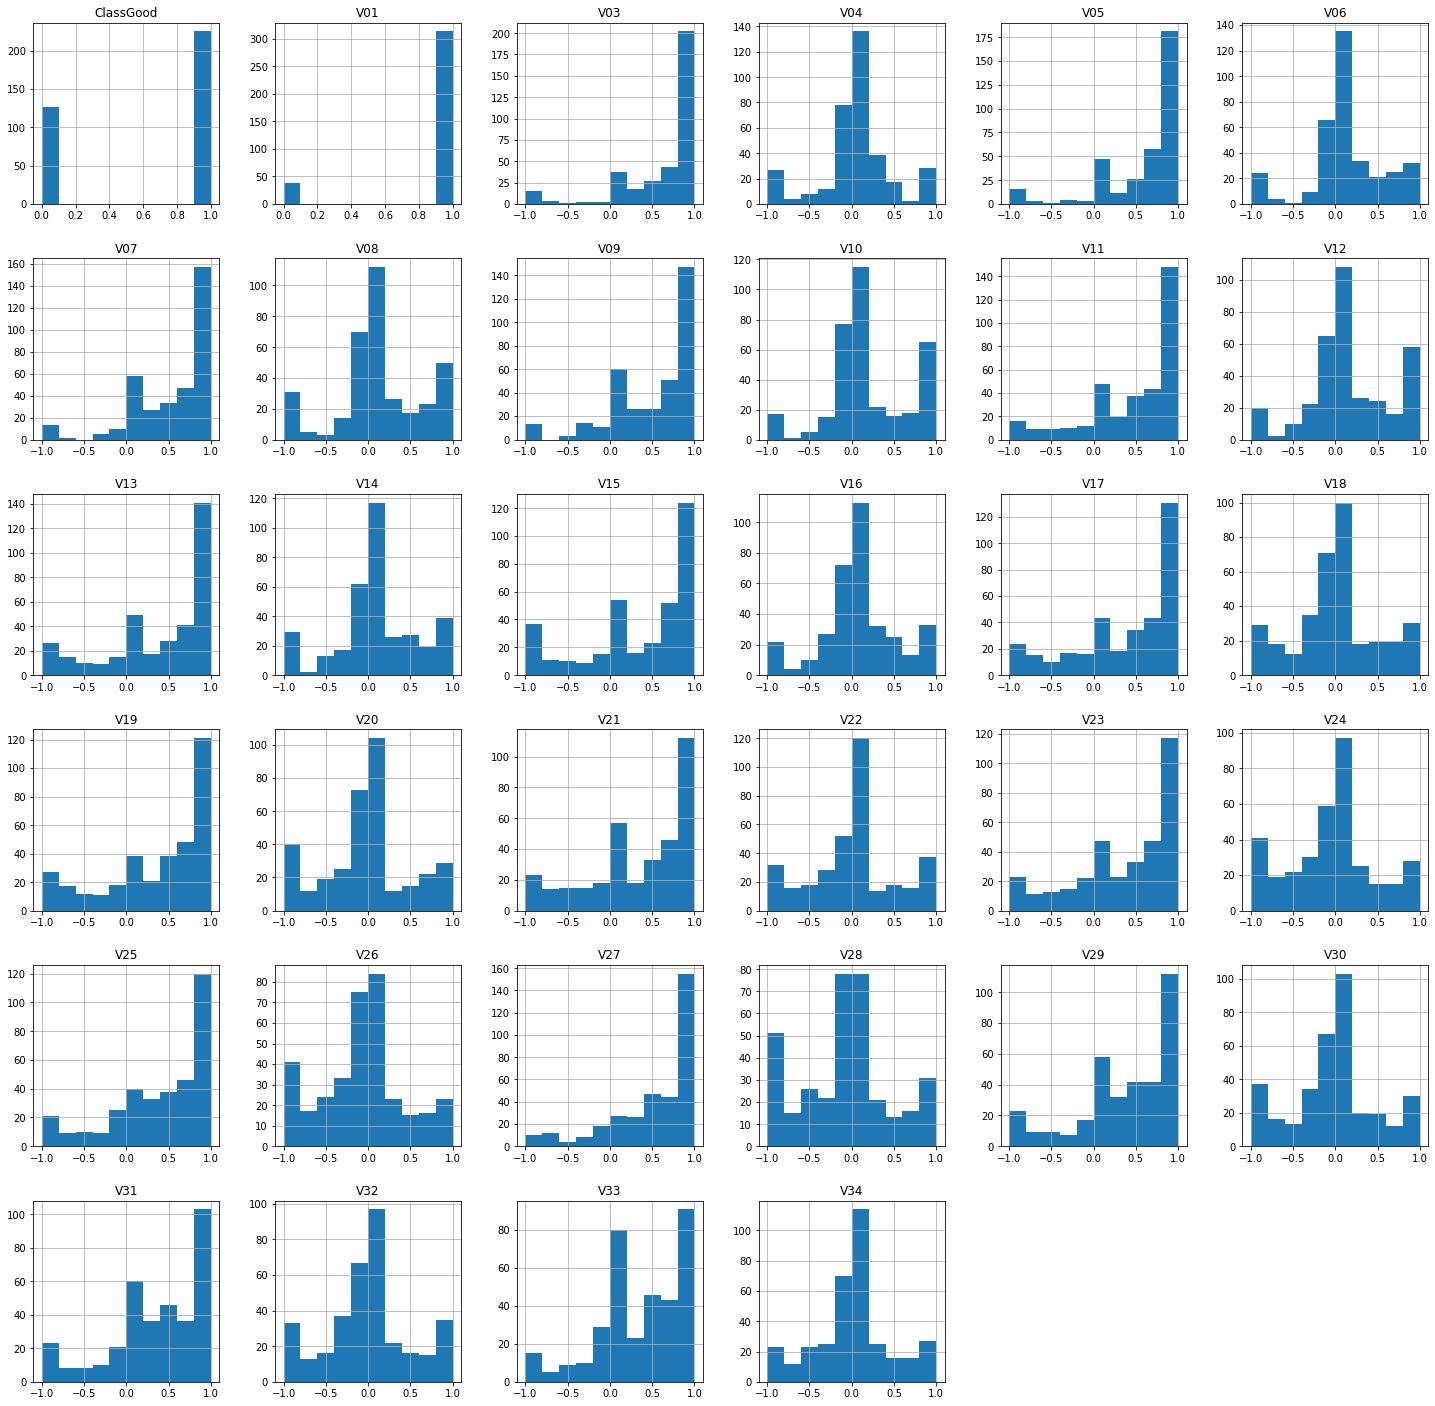

In [219]:
%matplotlib inline
# Univariate Histograms
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (25,25))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

Podemos ver que quizás los atributos `V03`, `V05`, `V07`, `V09`, `V11`, `V13`, `V17`, `V19`, `V21`, `V23`, `V25`, `V27`y `V29` pueden tener una distribución exponencial. También podemos ver que quizás los atributos `V04`, `V06`, `V10`, `V12`, `V16`, `V18`, `V20`, `V22`, `V24`, `V30`, `V32` y `V34` pueden tener una distribución gaussiana o casi gaussiana. Esto es interesante porque muchas técnicas de aprendizaje automático suponen una distribución univariada gaussiana en las variables de entrada.

Esta misma representación puede verse con el paquete [Seaborn](https://seaborn.pydata.org/tutorial/distributions.html). Podemos ver los Histogramas con una línea de densidad que nos muestra su distribución.

In [ ]:
%matplotlib inline
# Univariate Histograms
import matplotlib.pyplot as plt
import seaborn as sns
f,axes = plt.subplots(6, 6, figsize =(25,25))
sns.distplot(data["V01"], ax = axes[0,0])
sns.distplot(data["V03"], ax = axes[0,1])
sns.distplot(data["V04"], ax = axes[0,2])
sns.distplot(data["V05"], ax = axes[0,3])
sns.distplot(data["V06"], ax = axes[0,4])
sns.distplot(data["V07"], ax = axes[0,5])
sns.distplot(data["V08"], ax = axes[1,0])
sns.distplot(data["V09"], ax = axes[1,1])
sns.distplot(data["V10"], ax = axes[1,2])
sns.distplot(data["V11"], ax = axes[1,3])
sns.distplot(data["V12"], ax = axes[1,4])
sns.distplot(data["V13"], ax = axes[1,5])
sns.distplot(data["V14"], ax = axes[2,0])
sns.distplot(data["V15"], ax = axes[2,1])
sns.distplot(data["V16"], ax = axes[2,2])
sns.distplot(data["V17"], ax = axes[2,3])
sns.distplot(data["V18"], ax = axes[2,4])
sns.distplot(data["V19"], ax = axes[2,5])
sns.distplot(data["V20"], ax = axes[3,0])
sns.distplot(data["V21"], ax = axes[3,1])
sns.distplot(data["V22"], ax = axes[3,2])
sns.distplot(data["V23"], ax = axes[3,3])
sns.distplot(data["V24"], ax = axes[3,4])
sns.distplot(data["V25"], ax = axes[3,5])
sns.distplot(data["V26"], ax = axes[4,0])
sns.distplot(data["V27"], ax = axes[4,1])
sns.distplot(data["V28"], ax = axes[4,2])
sns.distplot(data["V29"], ax = axes[4,3])
sns.distplot(data["V30"], ax = axes[4,4])
sns.distplot(data["V31"], ax = axes[4,5])
sns.distplot(data["V32"], ax = axes[5,0])
sns.distplot(data["V33"], ax = axes[5,1])
sns.distplot(data["V34"], ax = axes[5,2])
sns.distplot(data["ClassGood"], ax = axes[5,3])

<a id="section22"></a>
## <font color="#004D7F" size=4>1.2. Densidad </font>

Las gráficas se ven como un histograma abstracto con una curva suave dibujada a través de la parte superior de cada contenedor. Podemos ver que la distribución de cada atributo es más clara que los histogramas.

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


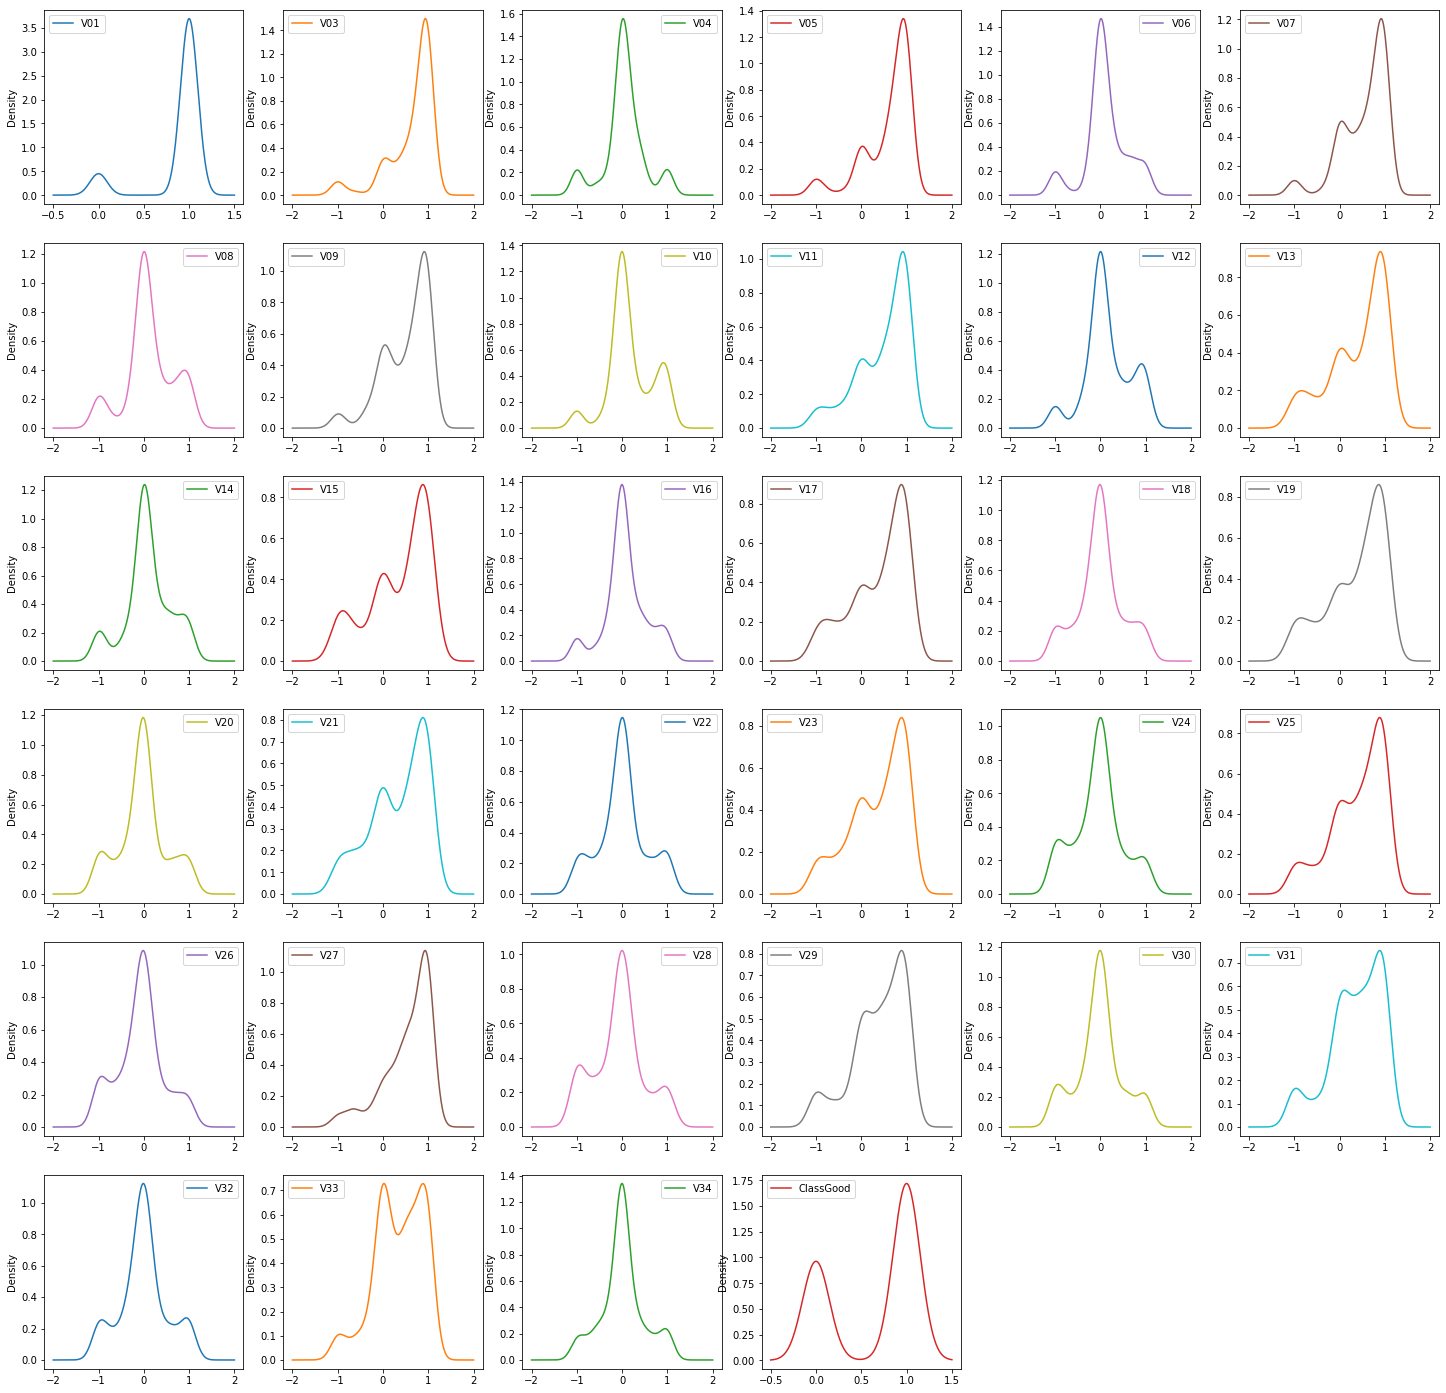

In [221]:
%matplotlib inline
# Univariate Histograms
fig = plt.figure(figsize = (25,25))
ax = fig.gca()
data.plot(ax = ax, kind = 'density', subplots = True, layout = (6,6), sharex = False)
plt.show()

Al igual que hemos visto antes podemos ver también el gráfico con la libreria Seaborn.

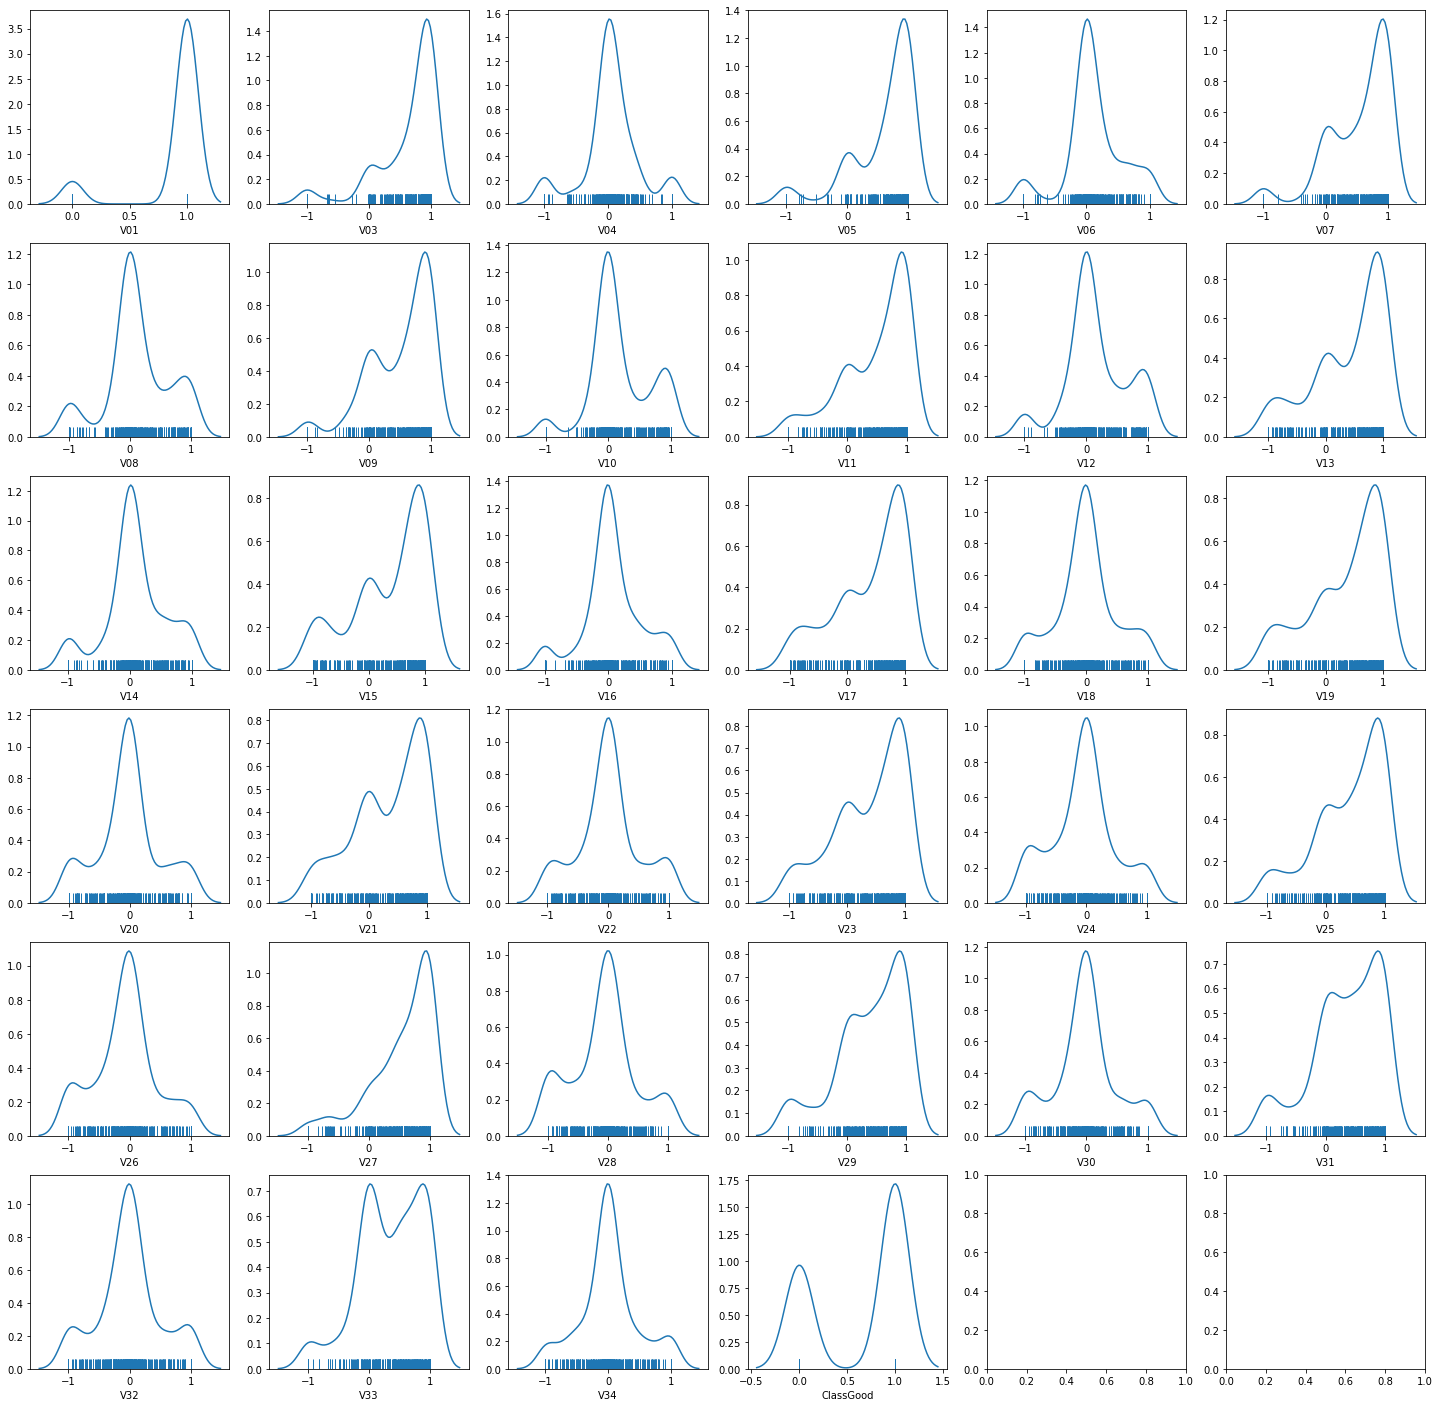

In [222]:
%matplotlib inline
# Univariate Histograms
f,axes = plt.subplots(6, 6, figsize =(25,25))
sns.distplot(data["V01"], hist = False, rug = True, ax = axes[0,0])
sns.distplot(data["V03"], hist = False, rug = True, ax = axes[0,1])
sns.distplot(data["V04"], hist = False, rug = True, ax = axes[0,2])
sns.distplot(data["V05"], hist = False, rug = True, ax = axes[0,3])
sns.distplot(data["V06"], hist = False, rug = True, ax = axes[0,4])
sns.distplot(data["V07"], hist = False, rug = True, ax = axes[0,5])
sns.distplot(data["V08"], hist = False, rug = True, ax = axes[1,0])
sns.distplot(data["V09"], hist = False, rug = True, ax = axes[1,1])
sns.distplot(data["V10"], hist = False, rug = True, ax = axes[1,2])
sns.distplot(data["V11"], hist = False, rug = True, ax = axes[1,3])
sns.distplot(data["V12"], hist = False, rug = True, ax = axes[1,4])
sns.distplot(data["V13"], hist = False, rug = True, ax = axes[1,5])
sns.distplot(data["V14"], hist = False, rug = True, ax = axes[2,0])
sns.distplot(data["V15"], hist = False, rug = True, ax = axes[2,1])
sns.distplot(data["V16"], hist = False, rug = True, ax = axes[2,2])
sns.distplot(data["V17"], hist = False, rug = True, ax = axes[2,3])
sns.distplot(data["V18"], hist = False, rug = True, ax = axes[2,4])
sns.distplot(data["V19"], hist = False, rug = True, ax = axes[2,5])
sns.distplot(data["V20"], hist = False, rug = True, ax = axes[3,0])
sns.distplot(data["V21"], hist = False, rug = True, ax = axes[3,1])
sns.distplot(data["V22"], hist = False, rug = True, ax = axes[3,2])
sns.distplot(data["V23"], hist = False, rug = True, ax = axes[3,3])
sns.distplot(data["V24"], hist = False, rug = True, ax = axes[3,4])
sns.distplot(data["V25"], hist = False, rug = True, ax = axes[3,5])
sns.distplot(data["V26"], hist = False, rug = True, ax = axes[4,0])
sns.distplot(data["V27"], hist = False, rug = True, ax = axes[4,1])
sns.distplot(data["V28"], hist = False, rug = True, ax = axes[4,2])
sns.distplot(data["V29"], hist = False, rug = True, ax = axes[4,3])
sns.distplot(data["V30"], hist = False, rug = True, ax = axes[4,4])
sns.distplot(data["V31"], hist = False, rug = True, ax = axes[4,5])
sns.distplot(data["V32"], hist = False, rug = True, ax = axes[5,0])
sns.distplot(data["V33"], hist = False, rug = True, ax = axes[5,1])
sns.distplot(data["V34"], hist = False, rug = True, ax = axes[5,2])
sns.distplot(data["ClassGood"], hist = False, rug = True, ax = axes[5,3])

<a id="section23"></a>
## <font color="#004D7F" size=4>2.3. Boxplots </font>

Podemos ver que la extensión de los atributos es bastante diferente. No se observan variables que estén sesgados hacia los valores más pequeños.

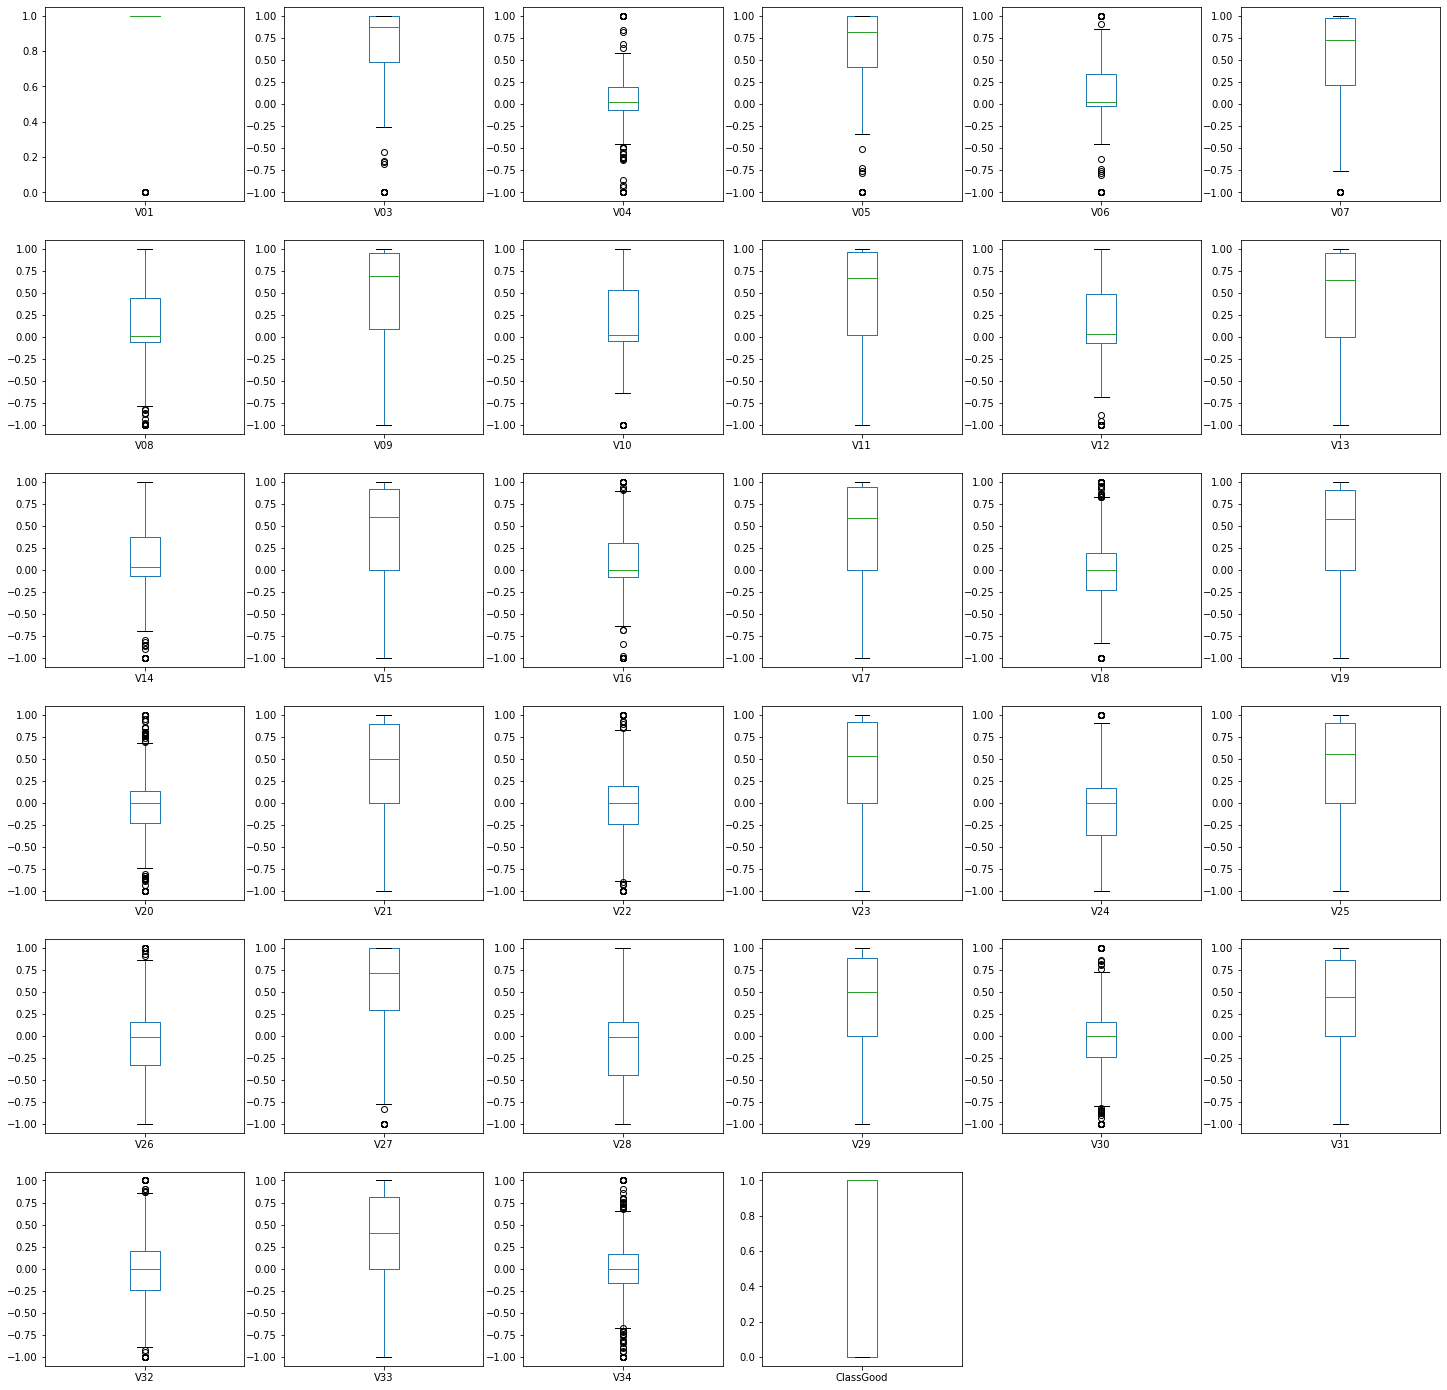

In [223]:
%matplotlib inline
# Univariate Boxplot
fig = plt.figure(figsize = (25,25))
ax = fig.gca()
data.plot(ax = ax, kind = 'box', subplots = True, layout = (6,6), sharex = False)
plt.show()

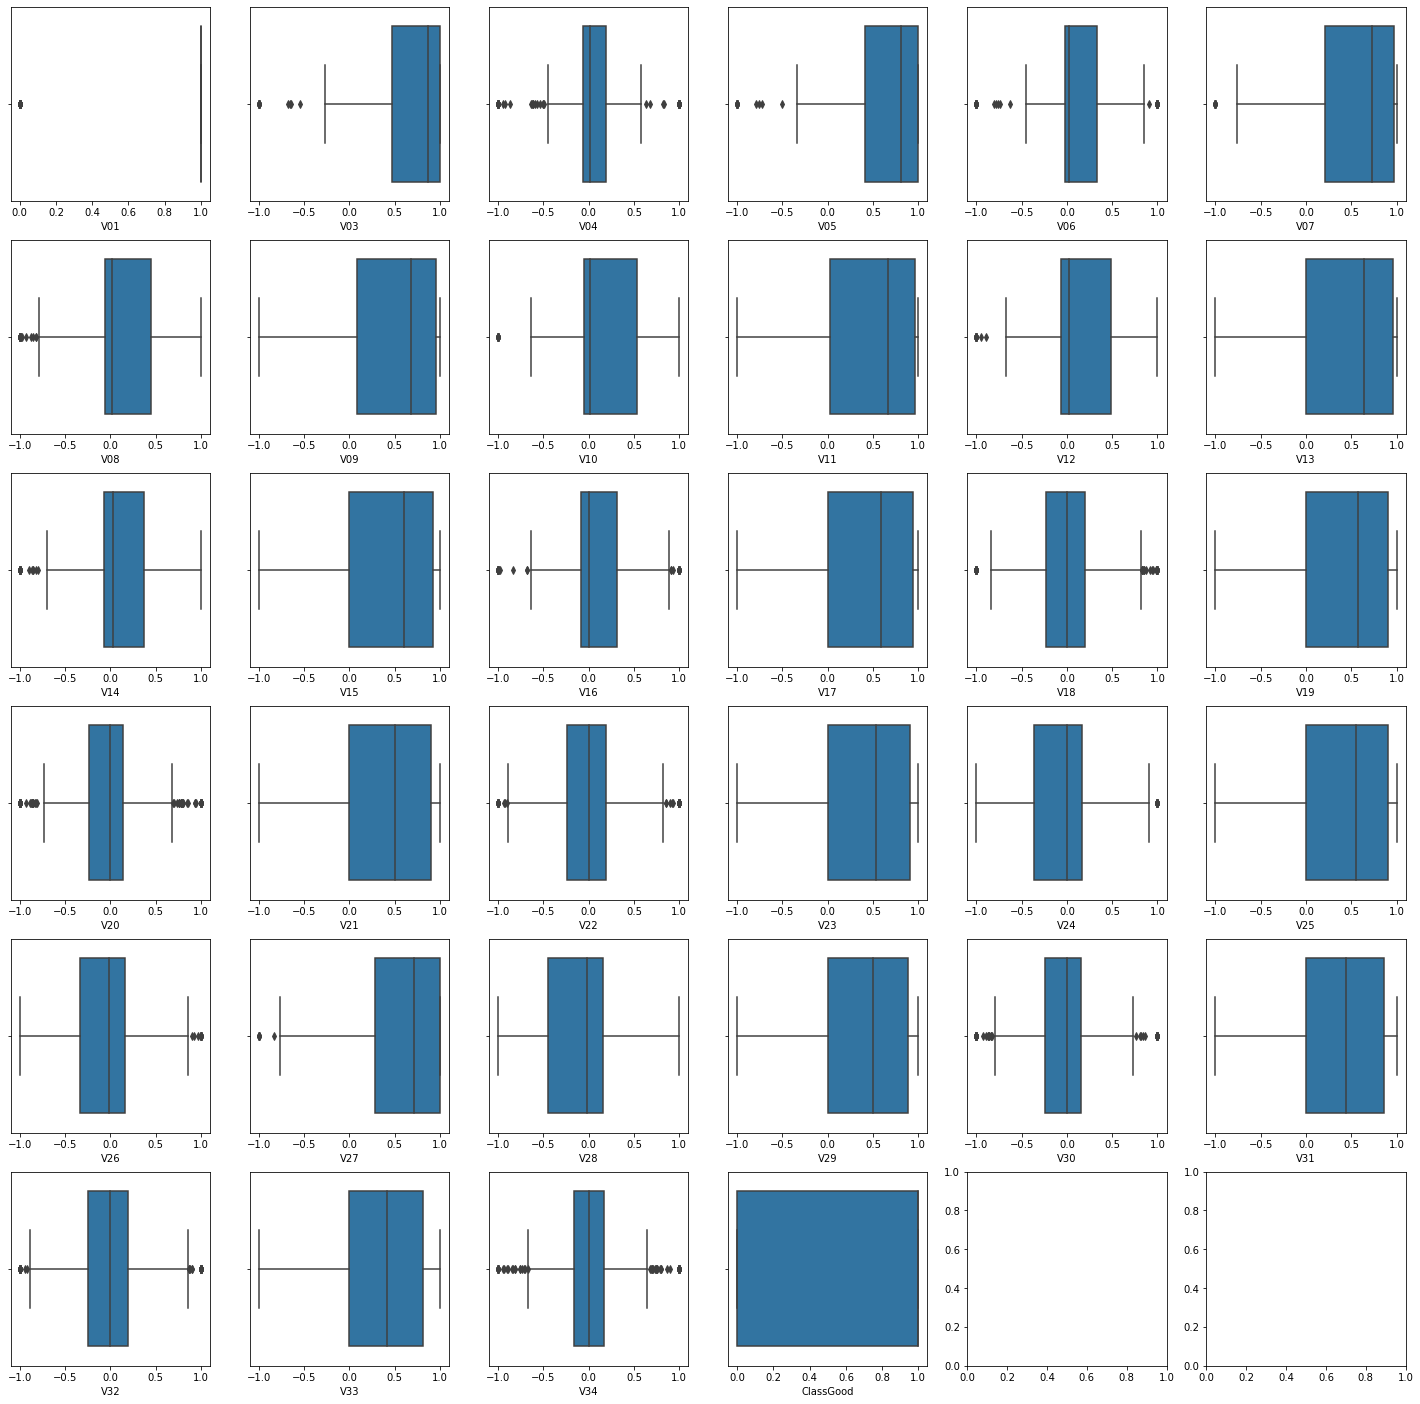

In [224]:
%matplotlib inline
# Univariate Boxplots
f,axes = plt.subplots(6, 6, figsize =(25,25))
sns.boxplot(data["V01"], ax = axes[0,0])
sns.boxplot(data["V03"], ax = axes[0,1])
sns.boxplot(data["V04"], ax = axes[0,2])
sns.boxplot(data["V05"], ax = axes[0,3])
sns.boxplot(data["V06"], ax = axes[0,4])
sns.boxplot(data["V07"], ax = axes[0,5])
sns.boxplot(data["V08"], ax = axes[1,0])
sns.boxplot(data["V09"], ax = axes[1,1])
sns.boxplot(data["V10"], ax = axes[1,2])
sns.boxplot(data["V11"], ax = axes[1,3])
sns.boxplot(data["V12"], ax = axes[1,4])
sns.boxplot(data["V13"], ax = axes[1,5])
sns.boxplot(data["V14"], ax = axes[2,0])
sns.boxplot(data["V15"], ax = axes[2,1])
sns.boxplot(data["V16"], ax = axes[2,2])
sns.boxplot(data["V17"], ax = axes[2,3])
sns.boxplot(data["V18"], ax = axes[2,4])
sns.boxplot(data["V19"], ax = axes[2,5])
sns.boxplot(data["V20"], ax = axes[3,0])
sns.boxplot(data["V21"], ax = axes[3,1])
sns.boxplot(data["V22"], ax = axes[3,2])
sns.boxplot(data["V23"], ax = axes[3,3])
sns.boxplot(data["V24"], ax = axes[3,4])
sns.boxplot(data["V25"], ax = axes[3,5])
sns.boxplot(data["V26"], ax = axes[4,0])
sns.boxplot(data["V27"], ax = axes[4,1])
sns.boxplot(data["V28"], ax = axes[4,2])
sns.boxplot(data["V29"], ax = axes[4,3])
sns.boxplot(data["V30"], ax = axes[4,4])
sns.boxplot(data["V31"], ax = axes[4,5])
sns.boxplot(data["V32"], ax = axes[5,0])
sns.boxplot(data["V33"], ax = axes[5,1])
sns.boxplot(data["V34"], ax = axes[5,2])
sns.boxplot(data["ClassGood"], ax = axes[5,3])

<a id="section3"></a>
# <font color="#004D7F" size=5> 2. Visualización Multivariable</font>

Los gráficos multivariables son los gráficos en los que podemos analizar la relación o interacciones entre atributos. El objetivo es aprender algo acerca de la distribución, la tendencia y la distribución en grupos de datos, generalmente pares de atributos.

<a id="section31"></a>
## <font color="#004D7F" size=4>2.1. Matriz de correlación </font>

Podemos ver que la matriz es simétrica, es decir, la parte inferior izquierda de la matriz es la misma que la parte superior derecha. Esto es útil ya que podemos ver dos vistas diferentes en los mismos datos en una parcela. También podemos ver que cada variable está perfectamente correlacionada positivamente entre sí (como era de esperar) en la línea diagonal desde la parte superior izquierda a la parte inferior derecha.

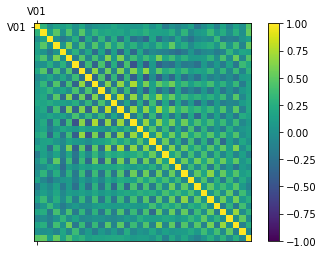

In [225]:
import numpy as np
%matplotlib inline

#names = ['V01','V03','V04','V05','V06','V07','V08','V09','V10','V11','V12','V13','V14','V15','V16','V17','V18',
#            'V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','V29','V30','V31','V32','V33','V34','ClassGood']

# Correlation matrix matplolib
correlations = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,20,20)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

Al igual que hemos visto antes podemos ver también el gráfico con la librería Seaborn.

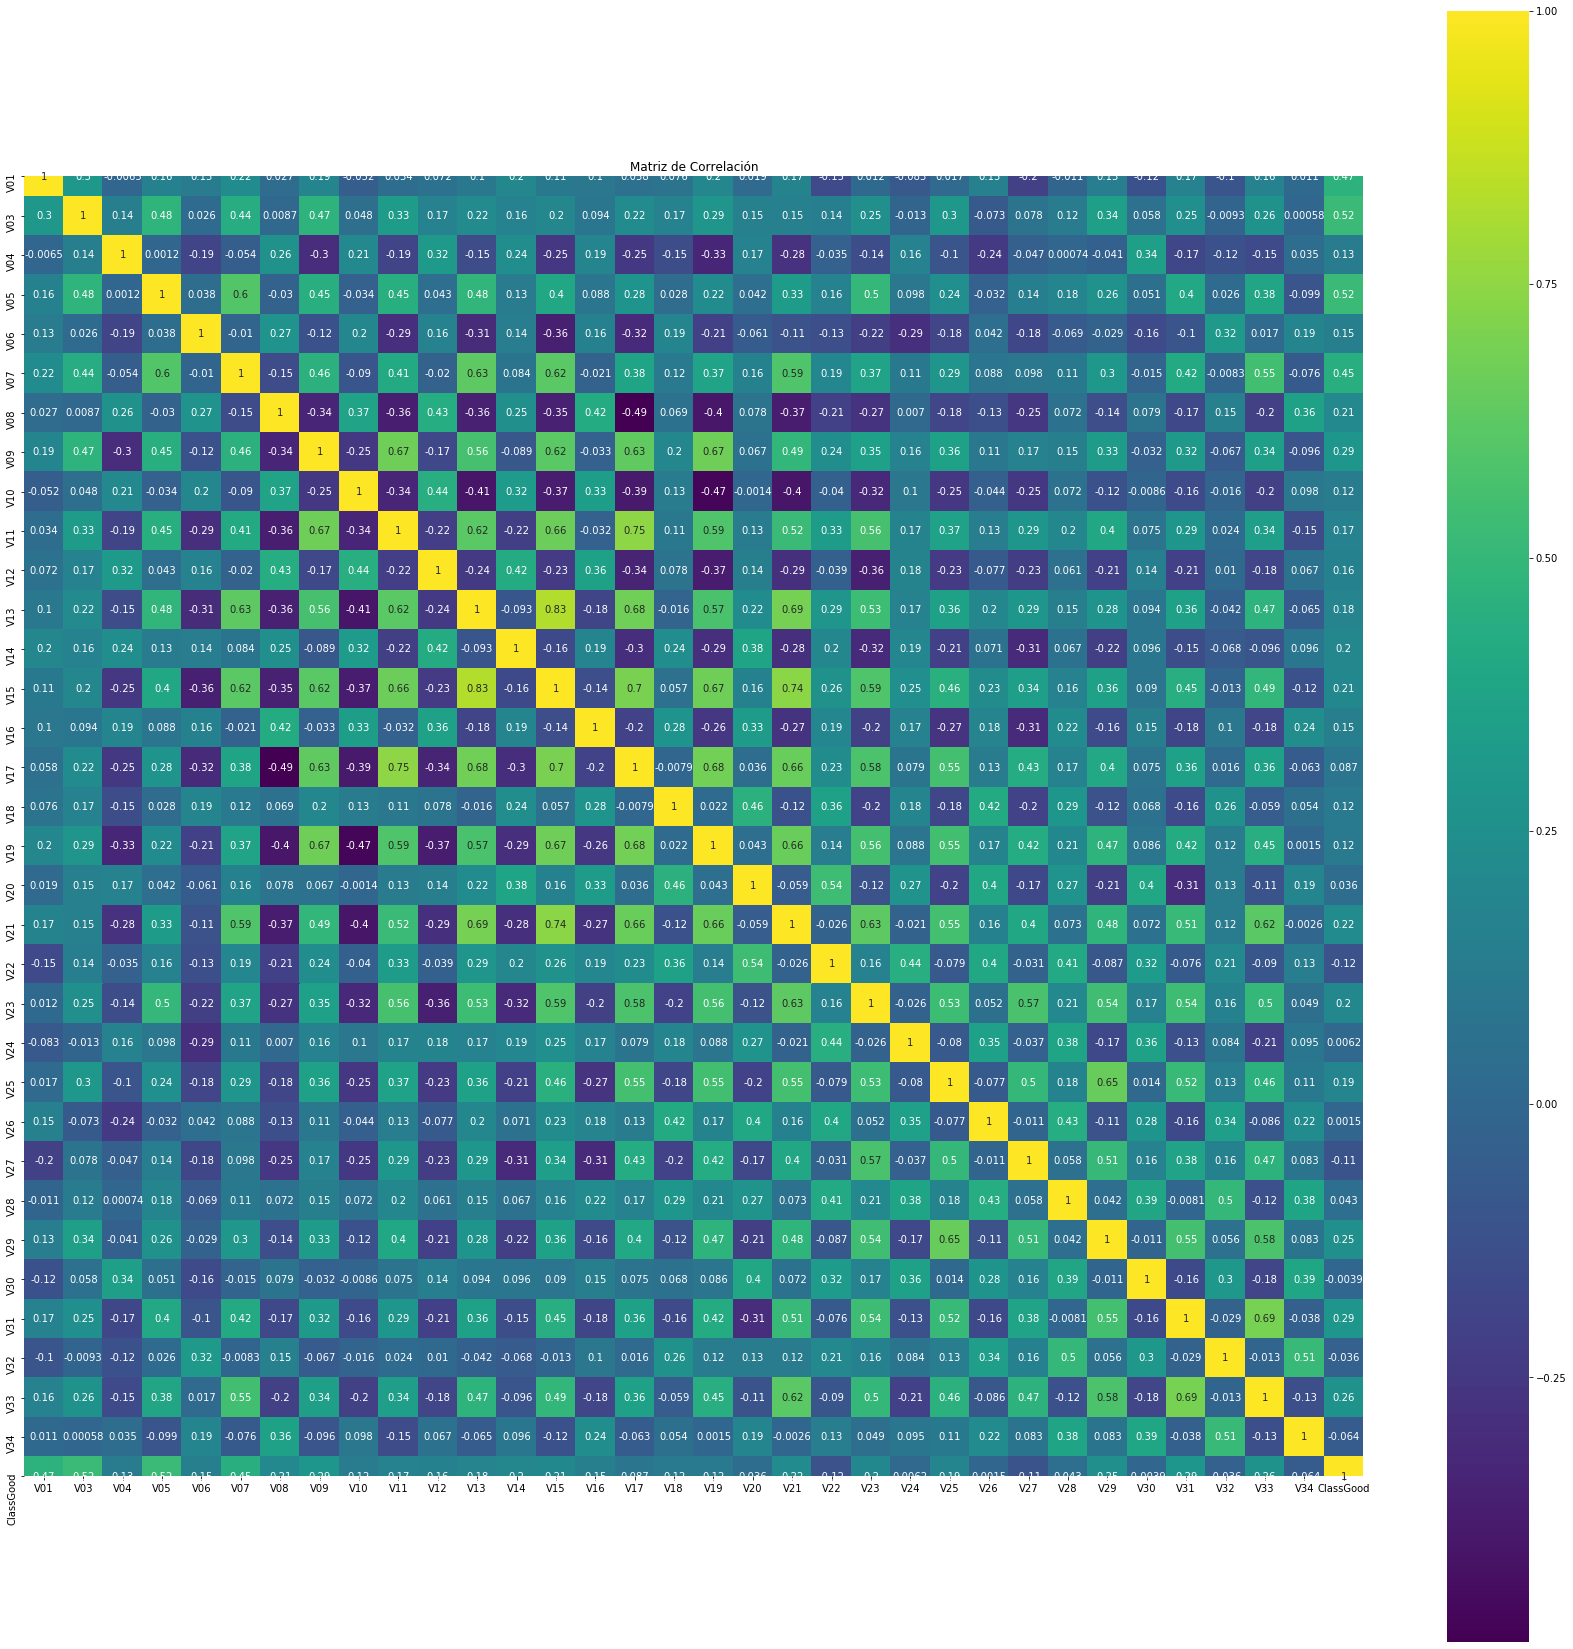

In [227]:
%matplotlib inline
# Correlatioin matrix matplolib
correlation = data.corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(correlation, vmax=1,square=True, annot=True, cmap='viridis')
plt.title("Matriz de Correlación")
plt.show()

<a id="section32"></a>
## <font color="#004D7F" size=4>2.2. Matriz de dispersión </font>

Al igual que el diagrama de matriz de correlación anterior, la matriz de diagrama de dispersión es simétrica. Esto es útil para mirar las relaciones por pares desde diferentes perspectivas. Debido a que no tiene mucho sentido dibujar un diagrama de dispersión de cada variable consigo mismo, la diagonal muestra histogramas de cada atributo.

In [ ]:
%matplotlib inline
# Correlatioin matrix matplolib
from pandas.plotting import scatter_matrix
plt.rcParams["figure.figsize"] = [10,5]
scatter_matrix(data)
plt.show()

Al igual que hemos visto antes podemos ver también el gráfico con la librería Seaborn.

In [ ]:
%matplotlib inline
# Correlatioin matrix Seaborn
sns.pairplot(data)

In [ ]:
data